In [1]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [2]:
# df=pd.read_csv('C:/Users/pudge/Downloads/EURRUB_200217_220317 (1).txt',sep=';',parse_dates=['<DATE>'])
# df=df.rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<HIGH>':'HIGH','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<TIME>':'TIME'})

In [3]:
# df['HOUR']=hour_list

In [4]:
# df['HOUR_COS'] = df['HOUR'].apply(lambda x: math.cos(x * 2 * math.pi / 24))
# df['HOUR_SIN'] =  df['HOUR'].apply(lambda x: math.sin(x * 2 * math.pi / 24))
# df.head()

In [5]:
# df.to_csv('EURUB.csv')

In [6]:
df = pd.read_csv('../input/eurrub/EURUB.csv', )

df.head()

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
0,0,2020-02-17,10000,68.8092,68.8890,68.7750,68.8125,73,1,0.965926,0.258819
1,1,2020-02-17,20000,68.7706,68.9820,68.7182,68.7404,172,2,0.866025,0.500000
2,2,2020-02-17,30000,68.8468,68.8774,68.7245,68.7886,114,3,0.707107,0.707107
3,3,2020-02-17,40000,68.7886,68.8540,68.7750,68.8072,116,4,0.500000,0.866025
4,4,2020-02-17,50000,68.8091,68.8550,68.7108,68.7144,514,5,0.258819,0.965926


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13312 entries, 0 to 13311
Data columns (total 11 columns):
Unnamed: 0    13312 non-null int64
DATE          13312 non-null object
TIME          13312 non-null int64
OPEN          13312 non-null float64
HIGH          13312 non-null float64
LOW           13312 non-null float64
CLOSE         13312 non-null float64
VOL           13312 non-null int64
HOUR          13312 non-null int64
HOUR_COS      13312 non-null float64
HOUR_SIN      13312 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.1+ MB


In [8]:
df_day = df[df['HOUR']==12]

In [9]:
df_day.head()

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
11,11,2020-02-17,120000,68.5798,68.6910,68.5224,68.6717,6560,12,-1.0,1.224647e-16
35,35,2020-02-18,120000,69.1413,69.1875,68.9721,69.0699,7113,12,-1.0,1.224647e-16
59,59,2020-02-19,120000,68.6987,68.7970,68.6419,68.7573,6924,12,-1.0,1.224647e-16
83,83,2020-02-20,120000,68.7061,68.9059,68.6464,68.8996,7150,12,-1.0,1.224647e-16
107,107,2020-02-21,120000,69.4257,69.6400,69.3659,69.5110,7496,12,-1.0,1.224647e-16


In [10]:
from sklearn.model_selection import train_test_split
train_columns = ['DATE','OPEN']
train = df_day[train_columns][:-15]
train = train.rename(columns={'DATE':'ds','OPEN':'y'})


In [11]:
train.tail(10)

,ds,y
12731,2022-02-07,87.4290
12755,2022-02-08,86.2320
12779,2022-02-09,85.6379
12803,2022-02-10,85.3108
12827,2022-02-11,85.7616
12851,2022-02-12,87.3760
12875,2022-02-14,87.3217
12899,2022-02-15,85.8882
12923,2022-02-16,85.6255
12947,2022-02-17,86.6820


In [12]:
m = Prophet(daily_seasonality=False)
# m.add_seasonality(name='yearly', period=12, fourier_order=5)
m.fit(train)

In [13]:
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(18)

,ds,yhat,yhat_lower,yhat_upper
534,2022-02-11,86.633013,85.301725,87.965309
535,2022-02-12,86.583774,85.202038,87.933748
536,2022-02-14,86.387183,85.012308,87.725910
537,2022-02-15,86.234739,84.863287,87.558242
538,2022-02-16,86.042788,84.601105,87.451411
539,2022-02-17,86.020894,84.747891,87.348044
540,2022-02-18,85.853771,84.542612,87.126119
541,2022-02-19,85.838163,84.568964,87.070940
542,2022-02-20,85.478111,84.226456,86.812593
543,2022-02-21,85.760540,84.363385,87.034214


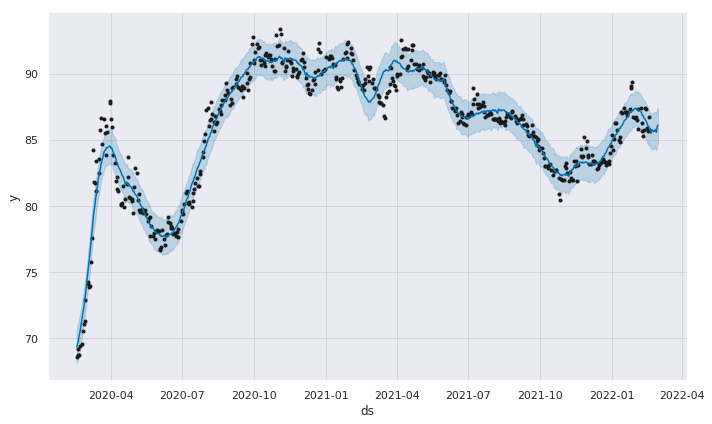

In [14]:
figure = m.plot(forecast)

In [15]:
# Смотрим на ошибки модели
predictions = 30
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  1.0192326190677568 %
MAE (средняя абсолютная ошибка) –  0.8861512579357943


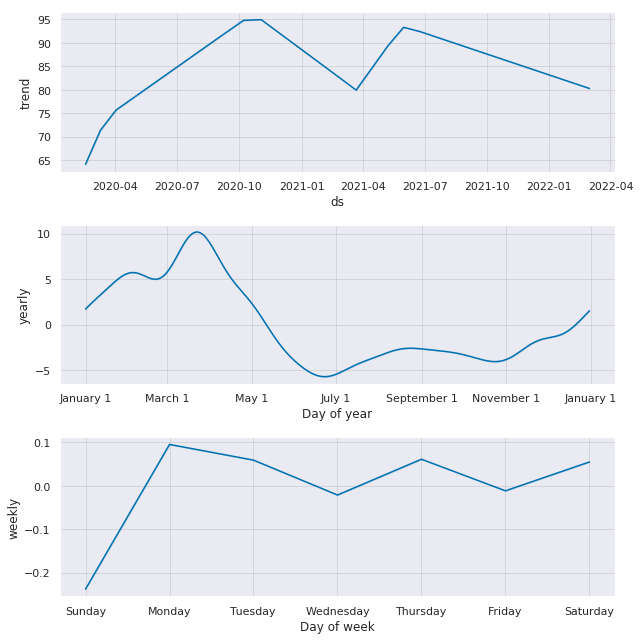

In [16]:
fig_decompose = m.plot_components(forecast)